# Introduction
# Customer Churn Prediction

This project predicts whether a customer will leave (churn) or stay, based on the Telco Customer Churn dataset.  
I used simple machine learning models like **Logistic Regression, Random Forest, and Gradient Boosting**.  
The steps include data cleaning, preprocessing, training, and evaluating the models.


Import Libraries

In [19]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load Data

In [20]:
# Step 2: Load Dataset (already uploaded in Colab files section)
data = pd.read_csv("/content/Churn_Modelling.csv")

print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [21]:
# Drop unnecessary columns
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ["Geography", "Gender"]:
    data[col] = le.fit_transform(data[col])

data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Train-Test Split

In [22]:
# Features & target
X = data.drop("Exited", axis=1)
y = data["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (8000, 10)
Test size: (2000, 10)


# Feature Scaling

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Models

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}


# Evaluation



Logistic Regression:
Accuracy: 0.805
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



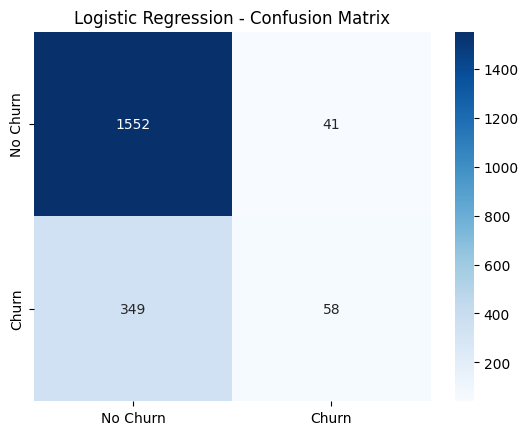


Random Forest:
Accuracy: 0.8595
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



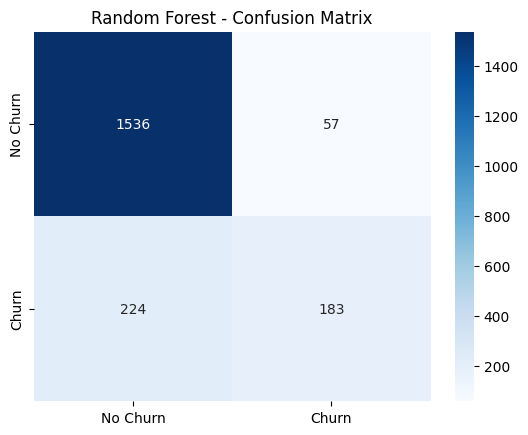


Gradient Boosting:
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.61       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



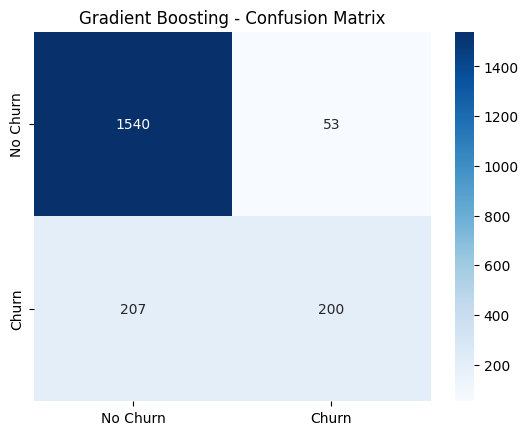

In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}:")
    print("Accuracy:", round(acc, 4))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


# Compare Results

In [26]:
# Best trained model
best_model = models["Gradient Boosting"]

print("Enter new customer details:")

CreditScore = int(input("Credit Score: "))   # e.g., 600
Geography = input("Geography (France/Germany/Spain): ")   # e.g., France
Gender = input("Gender (Male/Female): ")    # e.g., Male
Age = int(input("Age: "))   # e.g., 40
Tenure = int(input("Tenure (years with bank): "))   # e.g., 3
Balance = float(input("Balance: "))   # e.g., 60000
NumOfProducts = int(input("Number of Products: "))   # e.g., 2
HasCrCard = int(input("Has Credit Card? (1=Yes, 0=No): "))   # e.g., 1
IsActiveMember = int(input("Is Active Member? (1=Yes, 0=No): "))   # e.g., 1
EstimatedSalary = float(input("Estimated Salary: "))   # e.g., 50000

# Manual mapping instead of LabelEncoder
geo_map = {"France": 0, "Germany": 1, "Spain": 2}
gender_map = {"Female": 0, "Male": 1}

new_customer = pd.DataFrame([{
    "CreditScore": CreditScore,
    "Geography": geo_map.get(Geography, 0),  # default France=0
    "Gender": gender_map.get(Gender, 1),     # default Male=1
    "Age": Age,
    "Tenure": Tenure,
    "Balance": Balance,
    "NumOfProducts": NumOfProducts,
    "HasCrCard": HasCrCard,
    "IsActiveMember": IsActiveMember,
    "EstimatedSalary": EstimatedSalary
}])

# Scale features
new_scaled = scaler.transform(new_customer)

# Predict churn
prediction = best_model.predict(new_scaled)[0]

print("\nPrediction Result:")
if prediction == 1:
    print("⚠️ Customer is likely to CHURN (Exit).")
else:
    print("✅ Customer will NOT churn (Stay).")


Enter new customer details:
Credit Score: 750
Geography (France/Germany/Spain): France
Gender (Male/Female): Female
Age: 35
Tenure (years with bank): 50000
Balance: 2
Number of Products: 1
Has Credit Card? (1=Yes, 0=No): 1
Is Active Member? (1=Yes, 0=No): 60000
Estimated Salary: 60000

Prediction Result:
✅ Customer will NOT churn (Stay).
